# Decision Tree Classifier

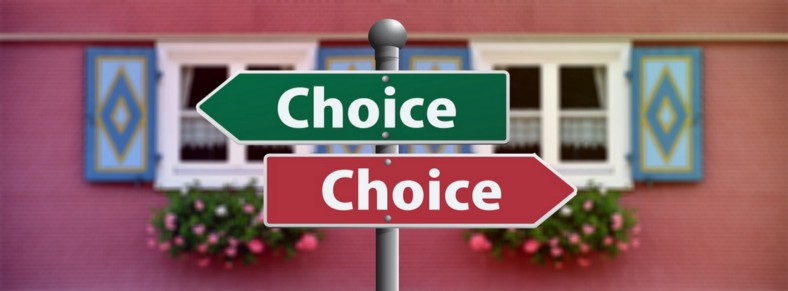

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Load the dataset

* **We will assign the 3 independent variables “Gender”, “Salary” and “Age” to X.**

* **The dependent variable that we need to predict — “Purchased iPhone” will be assigned to y.**

In [3]:
dataset =  pd.read_csv('iphone_purchase_records.csv')

In [5]:
dataset.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,3].values

# Convert Gender to Number

***The classification algorithm’s in sklearn library cannot handle categorical (text) data. In our data, we have the Gender variable which we have to convert to numerical format.
We will use the class LabelEncoder to convert Gender to number.***

In [7]:
labelEncoder_gender = LabelEncoder()

In [8]:
X[:,0] = labelEncoder_gender.fit_transform(X[:,0])

### Optional - if you want to convert X to float data type

In [9]:
X = np.vstack(X[:, :]).astype(np.float)

# Split data into training and test set

**We will use the train_test split method to split our data into training and testing set. We will use 25% data for testing purpose.**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit Decision Tree Classifier

**We will be using the DecisionTreeClassifier from the sklearn.tree library. When we create the object of DecisionTreeClassifier, we will set the criterion parameter as entropy.**

In [11]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# Make Predictions

**Now that we have trained the model, let’s make some predictions using the test dataset.**

In [13]:
y_pred = classifier.predict(X_test)

# Evaluate Performance of the Model

**In classification problems, we can compare the predicted results with the actual results using the confusion matrix.**

#### Confusion Matrix: It will tell us the number of correct and incorrect entries.

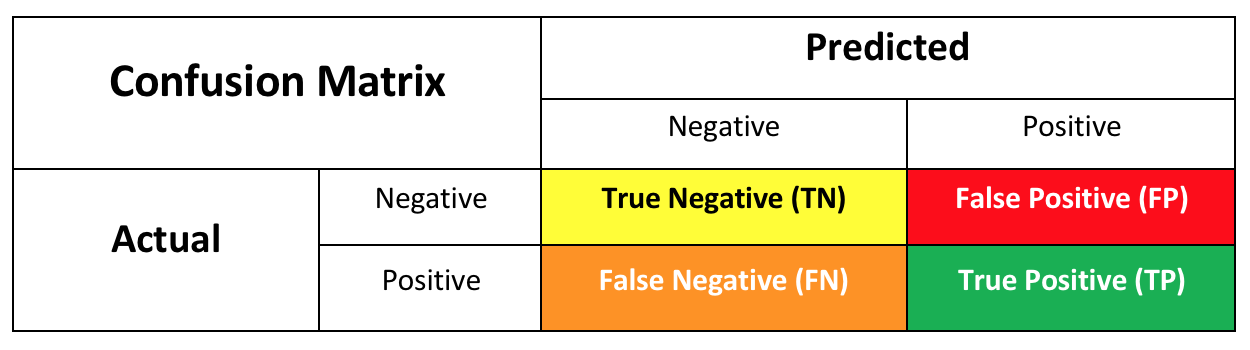

* Let’s spend a minute analyzing this matrix. What does this tell us?

* If a person has not bought an iPhone and the predicted value also says they have not bought — it is True Negative (TN) i.e. Actual value is 0and Predicted Value is also 0.

* If a person has not bought an iPhone but the predicted value says they did buy — it is False Positive (FP) i.e. Actual Value is 0 and Predicted Value is 1.

* If a person has bought an iPhone but the predicted value says they did not buy — it is False Negative (FN) i.e. Actual Value is 1 and Predicted Value is 0.

* If a person has bought an iPhone and the predicted value also says they bought — it is True Positive (TP) i.e. Actual value is 1 and Predicted Value is also 1.

### Accuracy Score: This is the most common metric that is used for checking the accuracy of the model. It is the percentage of total number of correct predictions by total number of predictions.

* **Accuracy Score = (TP + TN) / (TP + TN + FP + FN)**

### Recall Score: It is the percentage of positive events that we predicted correctly.

* **Recall Score = TP / (TP + FN)**

### Precision Score: It is the percentage of predicted positive events that are actually positive.

* **Precision = TP / (TP + FP)**


In [14]:
cm = metrics.confusion_matrix(y_test, y_pred)

In [17]:
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)

[[63  5]
 [ 3 29]]
Accuracy score: 0.92
Precision score: 0.8529411764705882
Recall score: 0.90625


**We have got 8(5+3) incorrect predictions and an accuracy score of 92% which is really good.**

# The End!